## import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

## Read Data

In [2]:
df=pd.read_csv('D:/MLdatasets/Modified laptops.csv')

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.head()

,price,Category,Inch,Core,Processor,Ram,Memory,Opysys
0,1799.0,HUAWEI,15.6,Core i5,-1155G,8GB,256GB,Windows11
1,2399.0,HUAWEI,NaN,Core i5,-12450H,16GB,512GB,Windows11
2,2599.0,HUAWEI,14.0,Core i5,-1240P,16GB,512GB,Windows11
3,3099.0,HUAWEI,NaN,Core i7,-13700H,16GB,1TB,Windows11
4,2599.0,HUAWEI,NaN,Core i5,-13420H,16GB,1TB,Windows11


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      863 non-null    float64
 1   Category   863 non-null    object 
 2   Inch       465 non-null    float64
 3   Core       609 non-null    object 
 4   Processor  570 non-null    object 
 5   Ram        819 non-null    object 
 6   Memory     734 non-null    object 
 7   Opysys     432 non-null    object 
dtypes: float64(2), object(6)
memory usage: 54.1+ KB


In [6]:
df.isnull().sum()

price          0
Category       0
Inch         398
Core         254
Processor    293
Ram           44
Memory       129
Opysys       431
dtype: int64

### fill missing values

In [7]:
#Core
core_mode = df['Core'].mode().iloc[0]
df['Core']=df['Core'].fillna(core_mode)

In [8]:
df.isna().sum()

price          0
Category       0
Inch         398
Core           0
Processor    293
Ram           44
Memory       129
Opysys       431
dtype: int64

In [9]:
#Ram
Ram_mode = df['Ram'].mode().iloc[0]
df['Ram']=df['Ram'].fillna(Ram_mode)

In [10]:
#Memory
Memory_mode = df['Memory'].mode().iloc[0]
df['Memory']=df['Memory'].fillna(Memory_mode)

In [11]:
df.isna().sum()/df.shape[0]

price        0.000000
Category     0.000000
Inch         0.461182
Core         0.000000
Processor    0.339513
Ram          0.000000
Memory       0.000000
Opysys       0.499421
dtype: float64

In [12]:
df2=df.drop(['Inch','Processor','Opysys'],axis=1)

In [13]:
df2['Memory'].unique()

array(['256GB', '512GB', '1TB', '128GB', '2TB'], dtype=object)

### text preprocessing

In [14]:
#core
cores=df2['Core'].apply(lambda z:z.replace('Core i',''))

In [15]:
df2['Core']=cores

In [16]:
#ram
ram=df2['Ram'].apply(lambda z:z.replace('GB',''))

In [17]:
df2['Ram']=ram

In [18]:
#memory
memory=df2['Memory'].apply(lambda z:z.replace('GB','').replace('TB',''))

In [19]:
df2['Memory']=memory

In [20]:
#convert datatypes
df2['Ram']=df2['Ram'].astype(int)

In [21]:
df2['Memory']=df2['Memory'].astype(int)

### Categorical Encoding

In [22]:
#core
cores=df2['Core'].unique()
cores=sorted(cores)
cores={v:k for k,v in enumerate(cores)}
df2['Core']=df2['Core'].map(cores)

In [23]:
len(cores)

4

In [24]:
#ram
ram=df2['Ram'].unique()
ram=[int(i)for i in ram]
ram=sorted(ram)
ram={v:k for k,v in enumerate(ram)}
df2['Ram']=df2['Ram'].map(ram)

In [25]:
#memory
memory=df2['Memory'].unique()
memory=[128,256,512,1,2]
memory={v:k for k,v in enumerate(memory)}
df2['Memory']=df2['Memory'].map(memory)

In [26]:
#Category
category=df2['Category'].unique()
category={v:k for k,v in enumerate(category)}
df2['Category']=df2['Category'].map(category)

## Split features and target

In [27]:
X=df2.drop('price',axis=1)
y=df2['price']

In [28]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Build Model

In [29]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred=lm.predict(x_train)
score=mean_squared_error(y_train,y_pred)
score=np.sqrt(score)
score

2102.41176896759

In [31]:
random=RandomForestRegressor()
random.fit(x_train,y_train)

RandomForestRegressor()

In [32]:
y_pred=random.predict(x_train)
score=mean_squared_error(y_train,y_pred)
score=np.sqrt(score)
score

1083.249649209512

In [33]:
y_pred=random.predict(x_test)
score=mean_squared_error(y_test,y_pred)
score=np.sqrt(score)
score

1617.6767600384903

In [35]:
# models=[LinearRegression(),RandomForestRegressor(),XGBRegressor(),SVR()]
# for model in models:
#     scores=cross_val_score(model,X,y,cv=8,scoring='neg_mean_squared_error')
#     rmse=np.sqrt(-scores)
    
#     print(f'{model}\nscores:{rmse}\navarge scores:{np.mean(rmse)}')

## Fine tune

In [36]:
param_grid = {
    'n_estimators': range(10,200,10),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
grid=GridSearchCV(random,param_grid=param_grid,cv=5,scoring='neg_mean_squared_error')

In [37]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': range(10, 200, 10)},
             scoring='neg_mean_squared_error')

In [38]:
grid.best_estimator_

RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=50)

In [39]:
np.sqrt(-grid.best_score_)

1347.0266852716443

In [56]:
random_model=grid.best_estimator_

In [57]:
y_pred=random_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
rmse

1602.476172433366

In [49]:
y_pred=random_model.predict(x_train)
mse=mean_squared_error(y_train,y_pred)
rmse=np.sqrt(mse)
rmse

1089.2110119462845

In [ ]:
y_pred=best.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
rmse

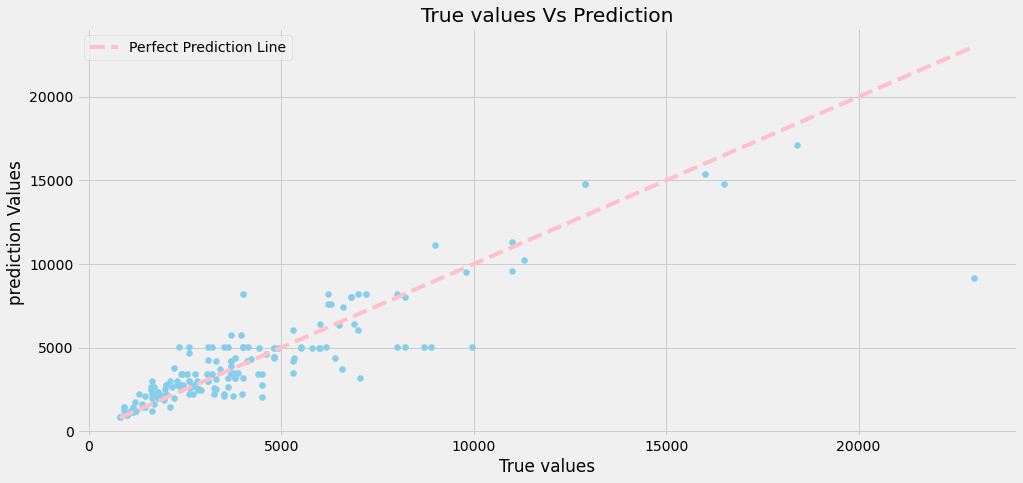

In [58]:
plt.figure(figsize=(15, 7))
plt.title('True values Vs Prediction')
plt.scatter(y_test, y_pred,c='skyblue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='pink' ,label='Perfect Prediction Line',linestyle='--')
plt.xlabel('True values')
plt.ylabel('prediction Values')
plt.legend(loc='upper left')
plt.show()

## Save The Model

In [54]:
import pickle
with open('D:\\Scraping_tasks\\randomclassifer.pkl', 'wb') as file:
      pickle.dump(random_model,file)
